[Reference](https://medium.com/@HeCanThink/matplotx-unleashing-x-factor-of-matplotlib-plots-in-python-8d63c68835f5)

In [1]:
pip install matplotx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


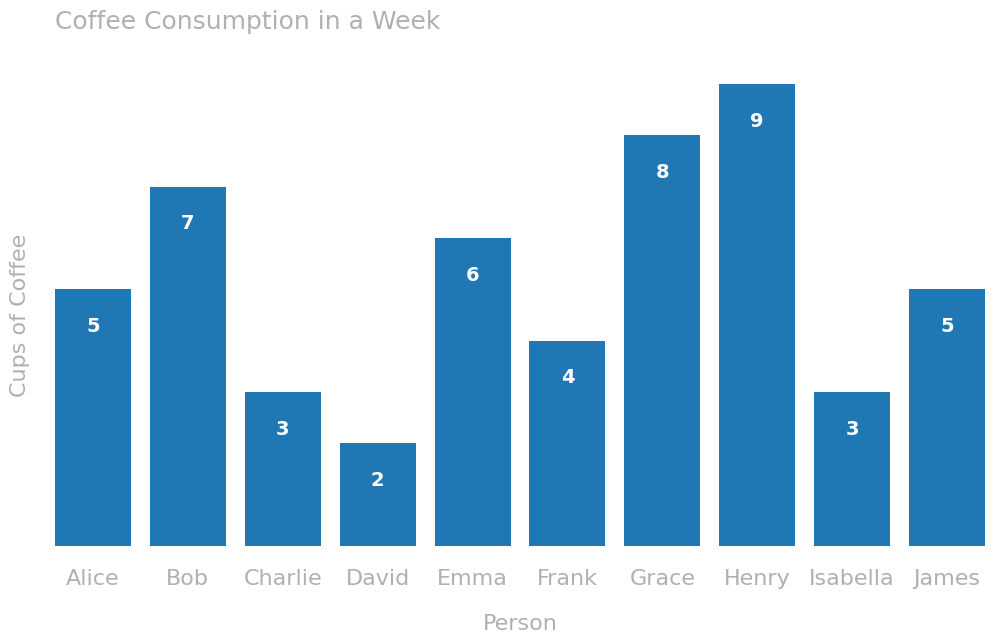

In [2]:
import matplotlib.pyplot as plt
import matplotx

# a bar chart
with plt.style.context(matplotx.styles.dufte_bar):
    people = ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Henry', 'Isabella', 'James']
    coffee_counts = [5, 7, 3, 2, 6, 4, 8, 9, 3, 5]
    plt.figure(figsize=(12, 6))
    plt.bar(people,coffee_counts)
    xpos = range(len(people))
    plt.xticks(xpos, people)
    matplotx.show_bar_values("{:.0f}")
    plt.xlabel('Person')
    plt.ylabel('Cups of Coffee')
    plt.title('Coffee Consumption in a Week')
    plt.show()
    plt.close()

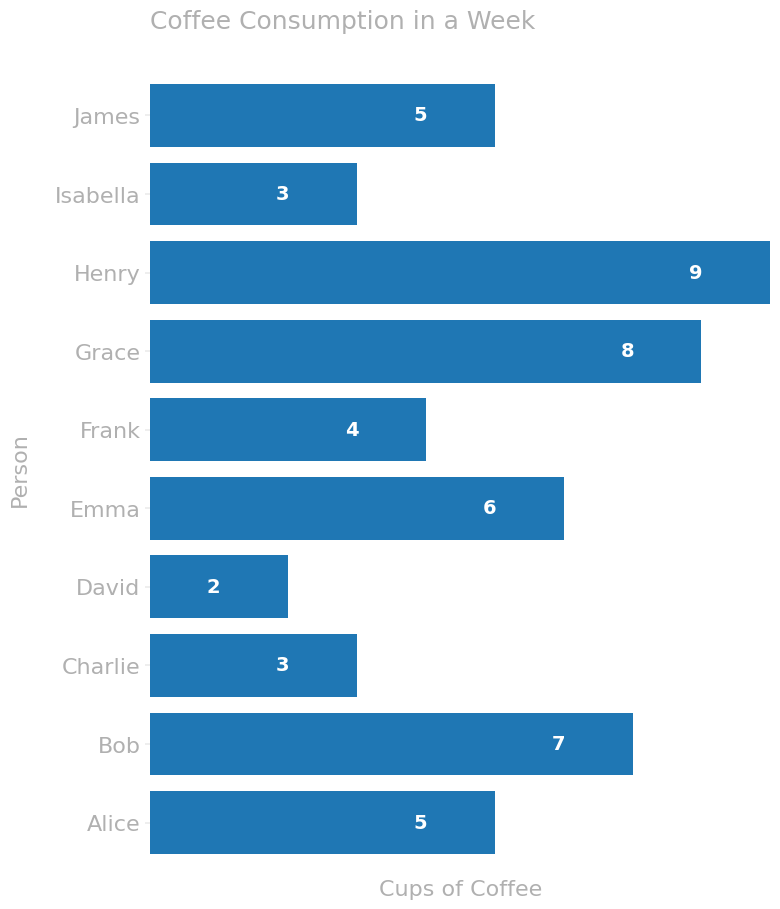

In [3]:
import matplotlib.pyplot as plt
import matplotx

# a bar chart can be created with horizontal alignment
with plt.style.context(matplotx.styles.dufte_bar):
    people = ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Henry', 'Isabella', 'James']
    coffee_counts = [5, 7, 3, 2, 6, 4, 8, 9, 3, 5]
    plt.figure(figsize=(8, 10))
    xpos = range(len(people))
    plt.barh(people,coffee_counts)
    plt.xticks(xpos, people)
    matplotx.show_bar_values("{:.0f}", alignment="horizontal")
    plt.xlabel('Cups of Coffee')
    plt.ylabel('Person')
    plt.title('Coffee Consumption in a Week')
    plt.show()
    plt.close()

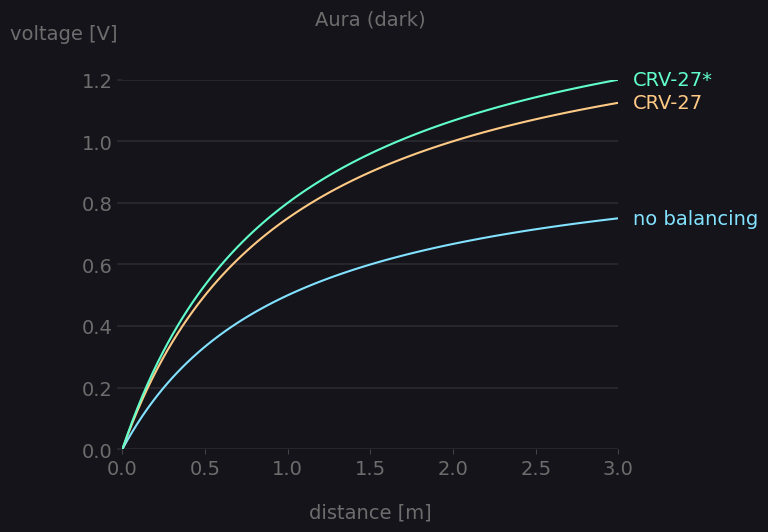

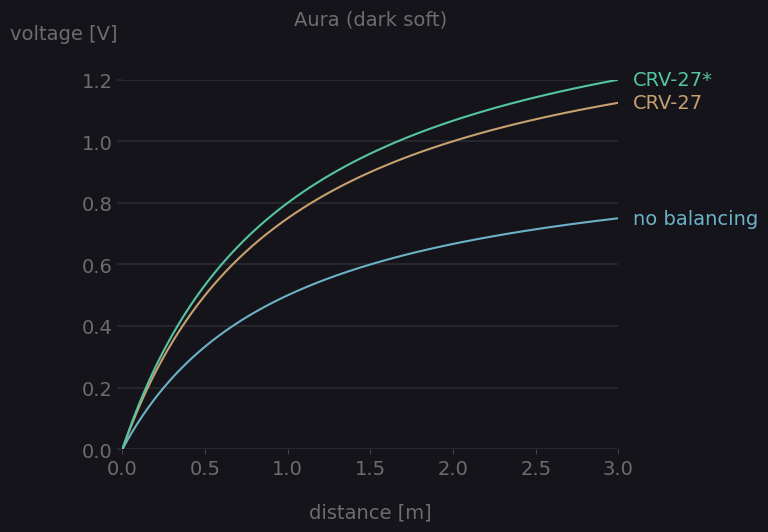

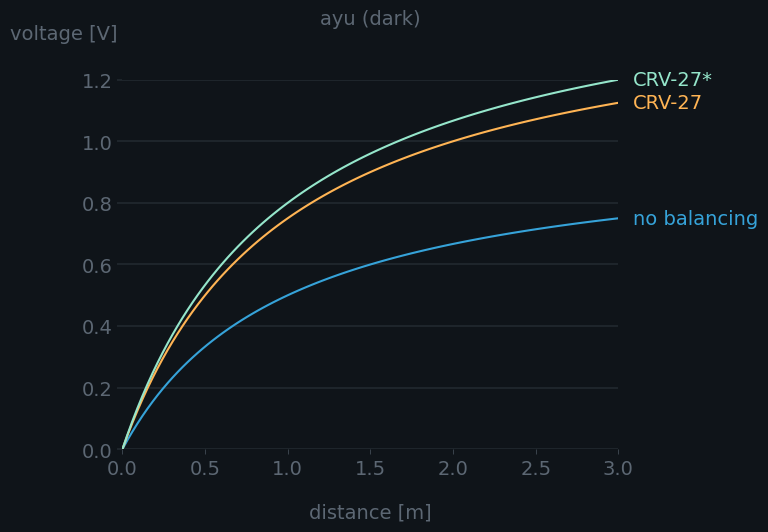

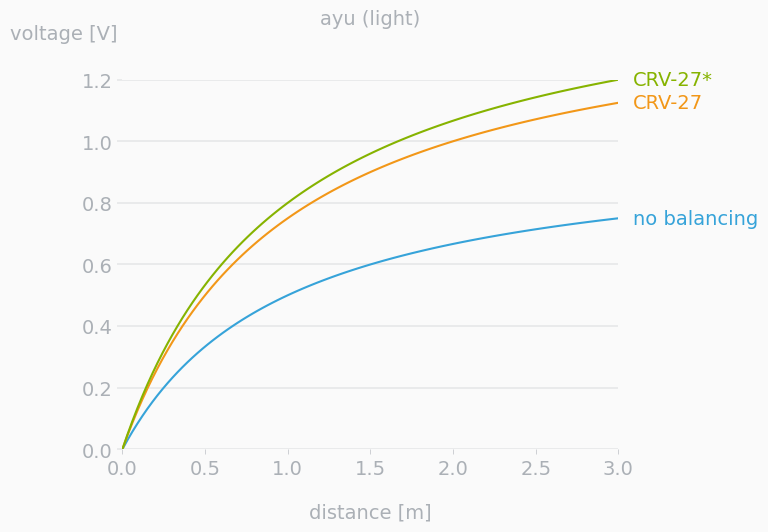

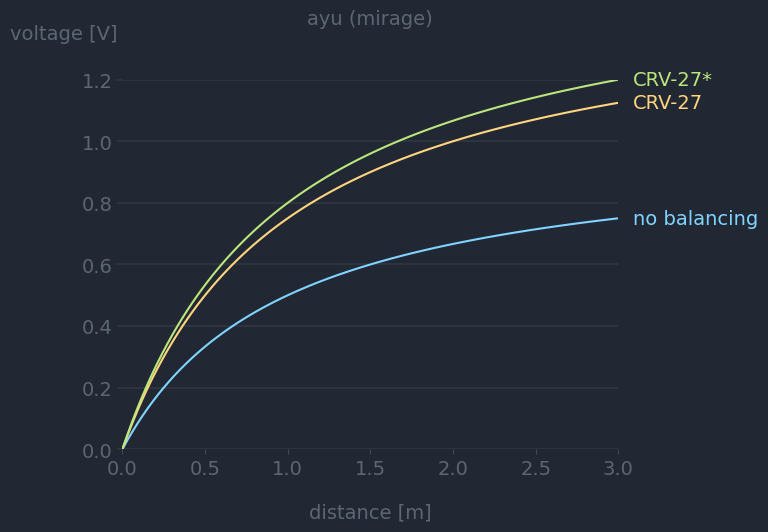

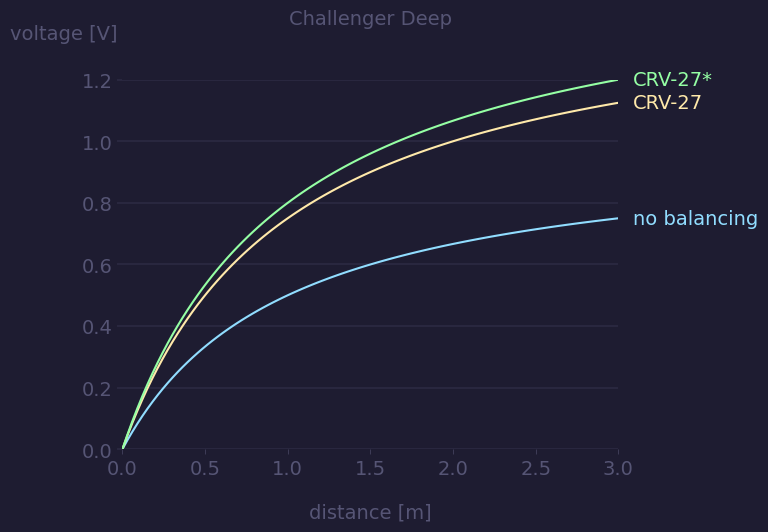

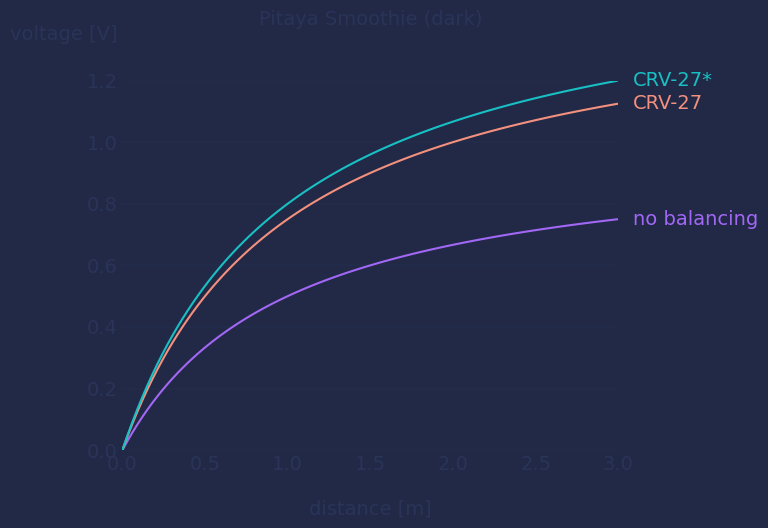

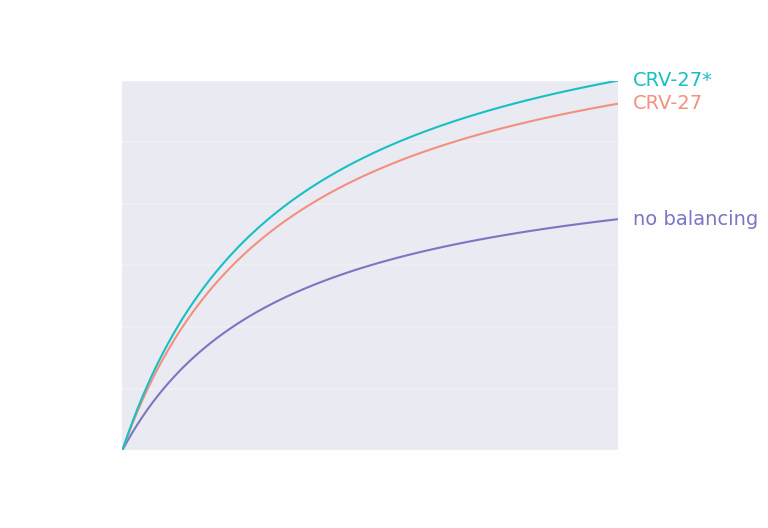

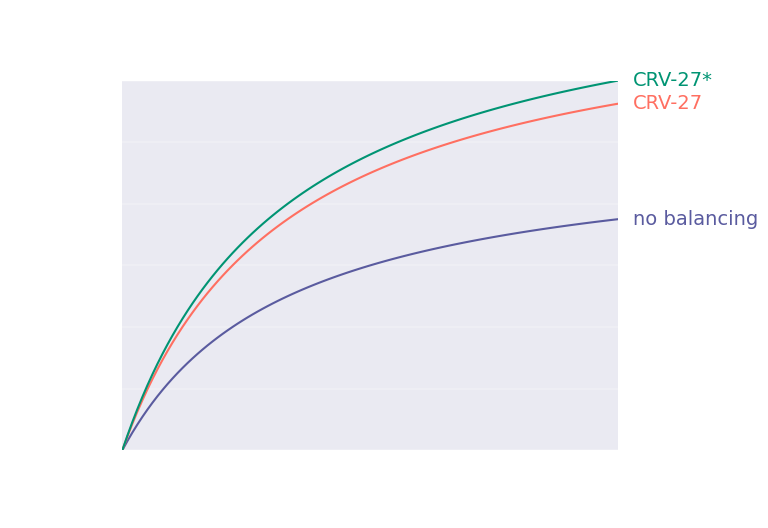

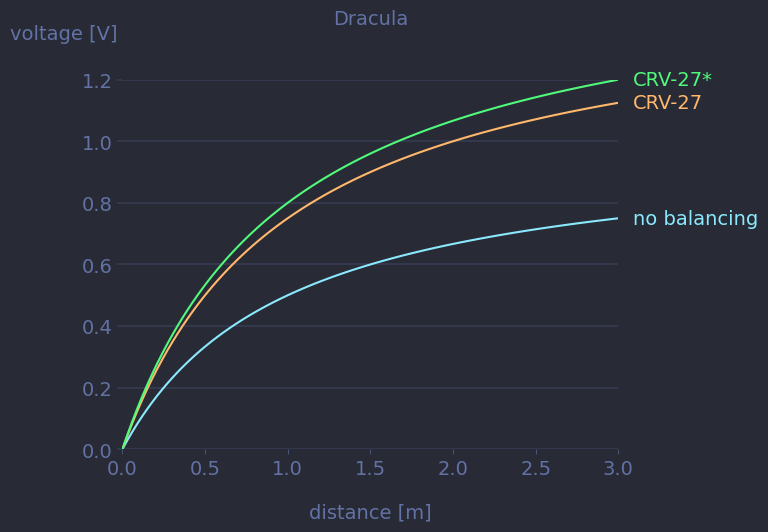

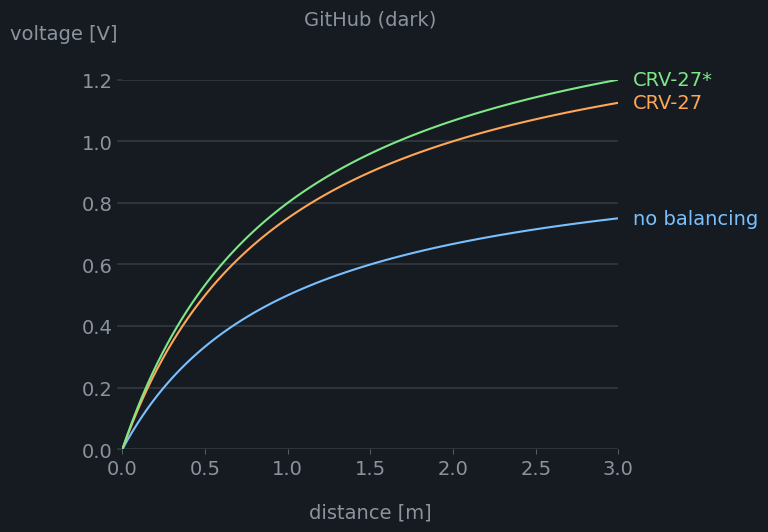

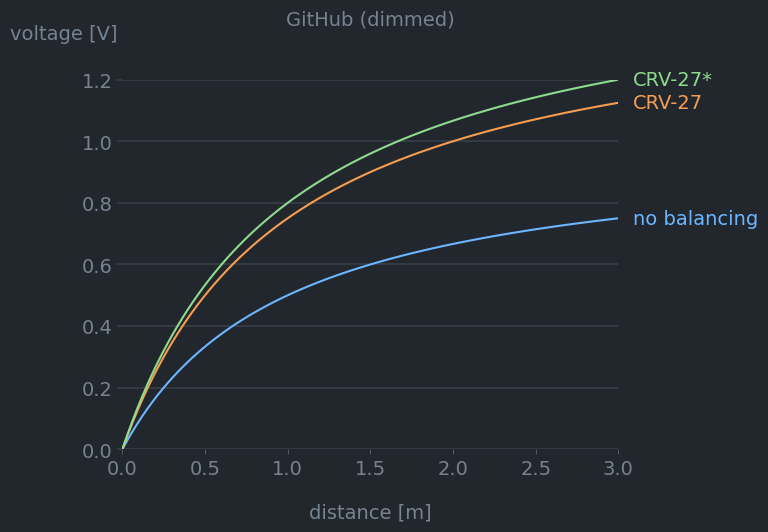

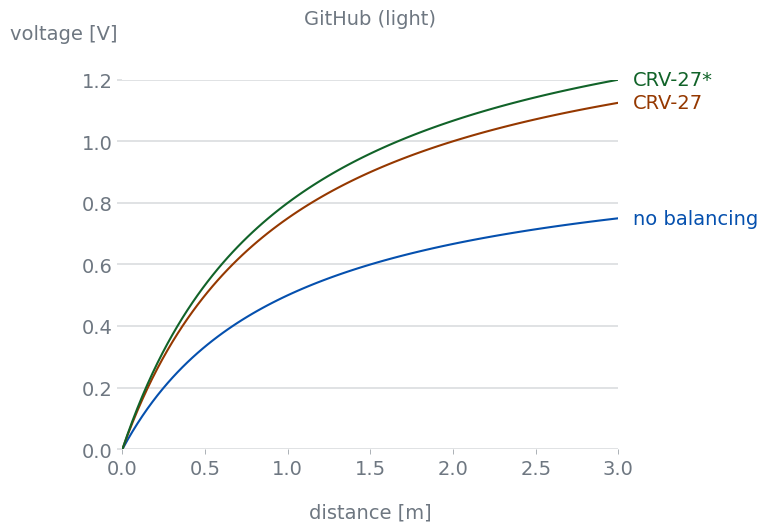

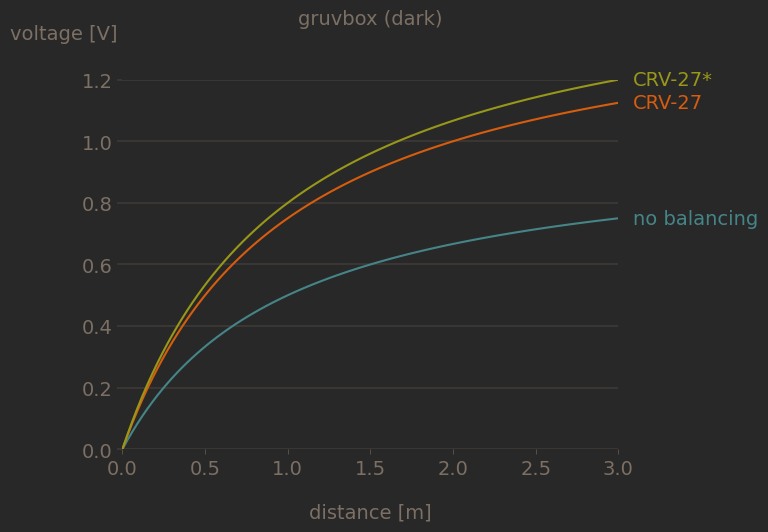

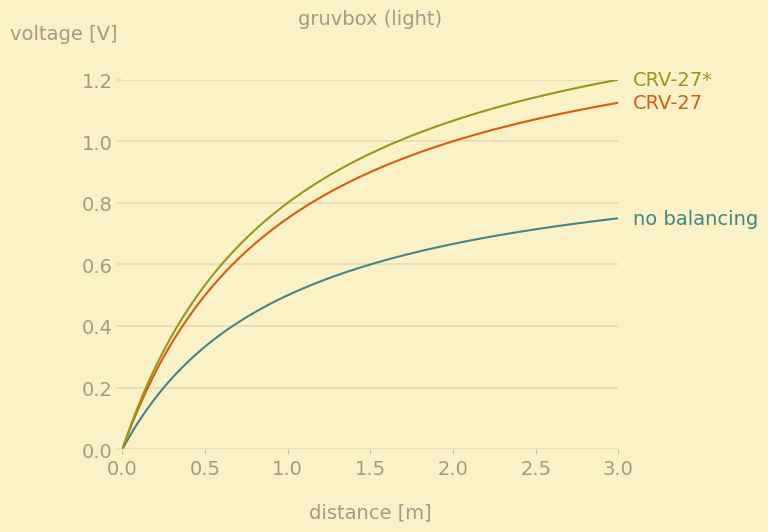

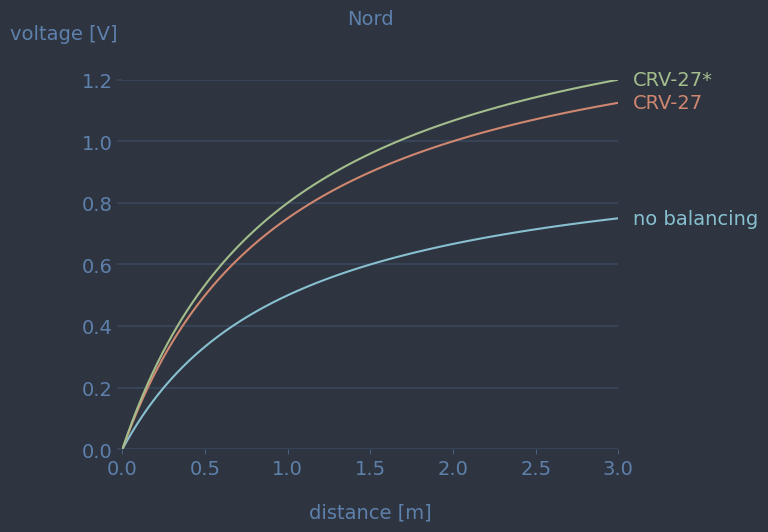

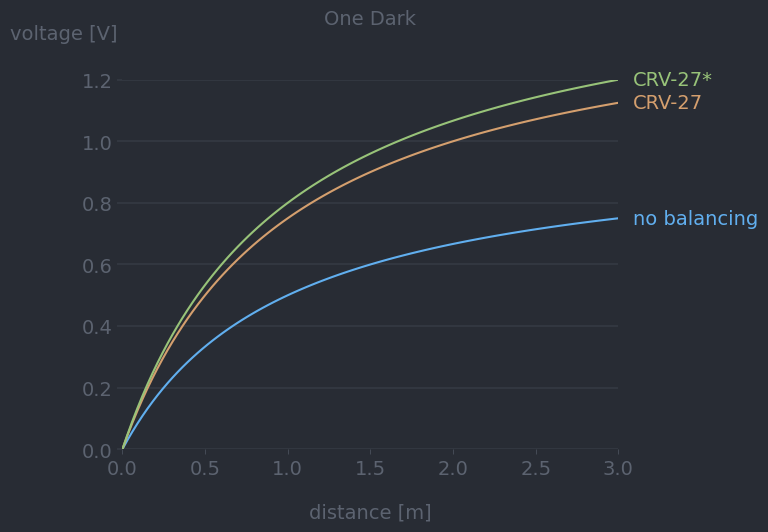

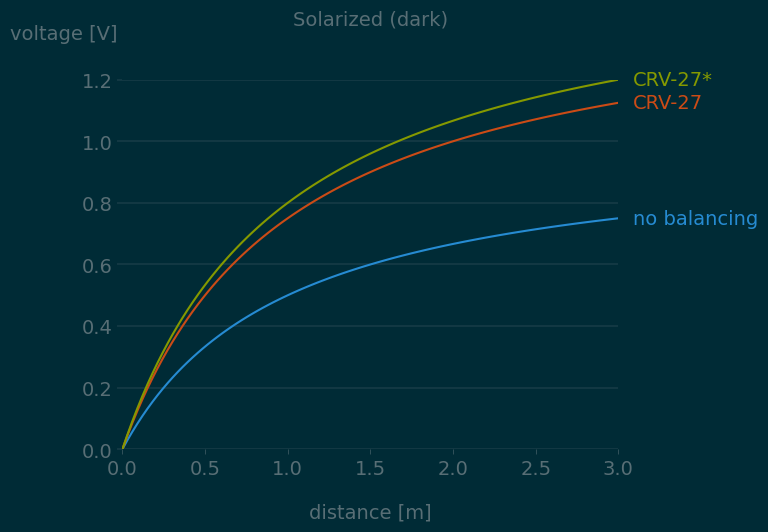

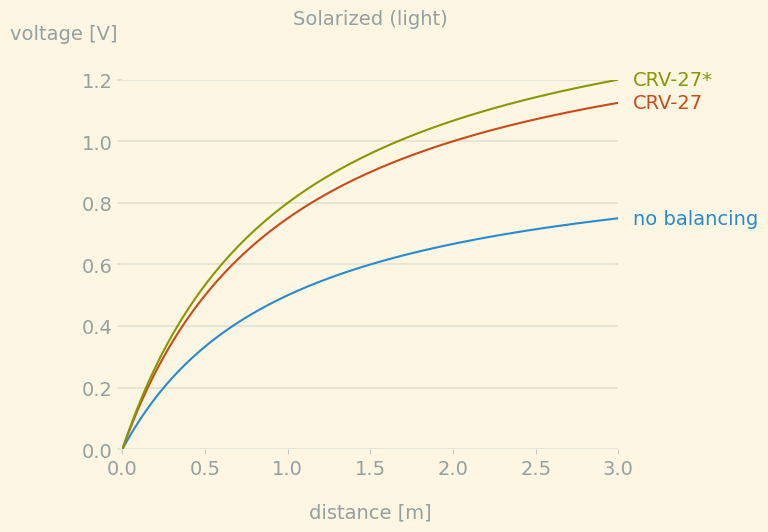

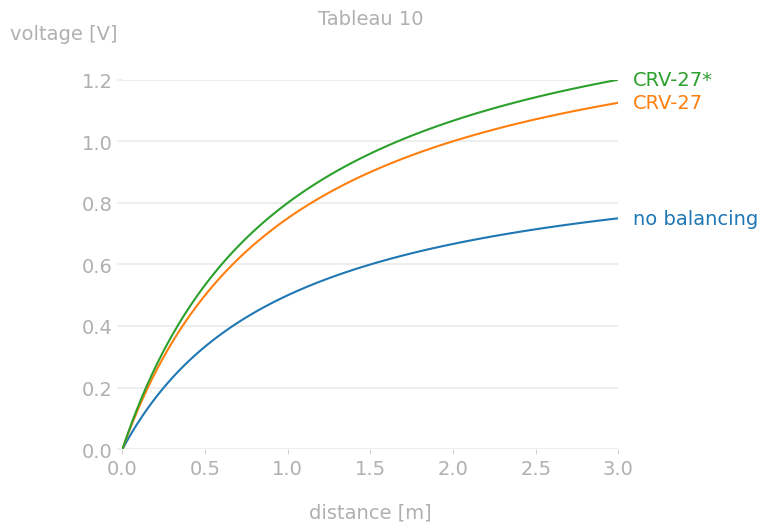

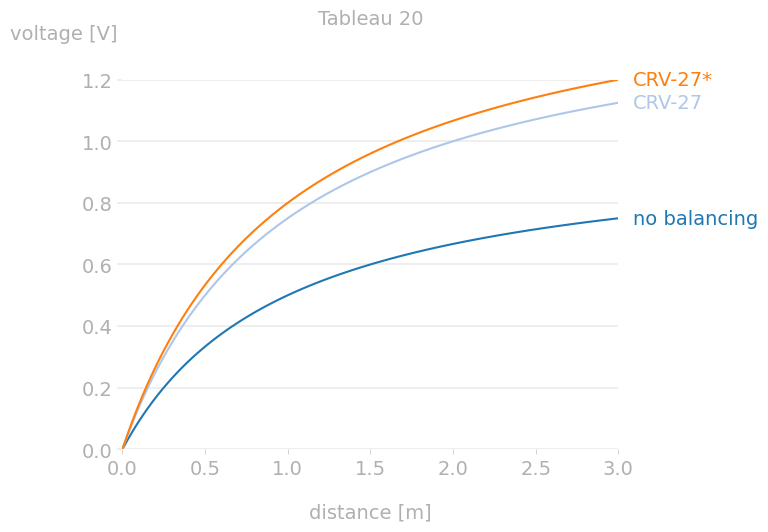

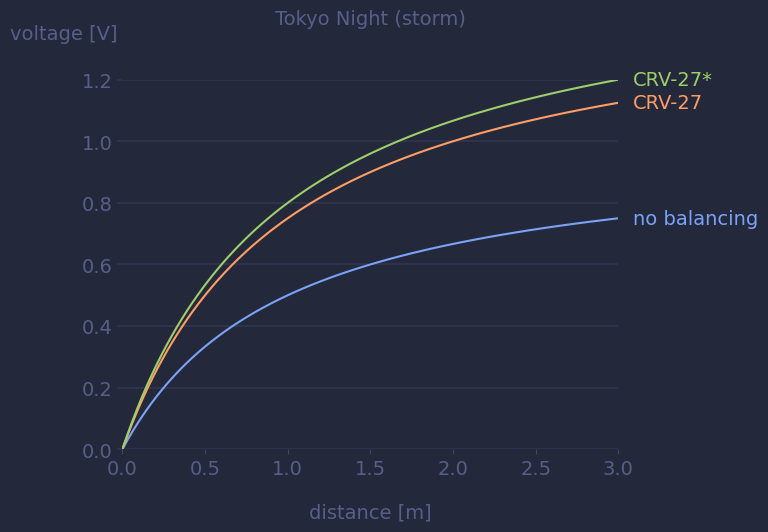

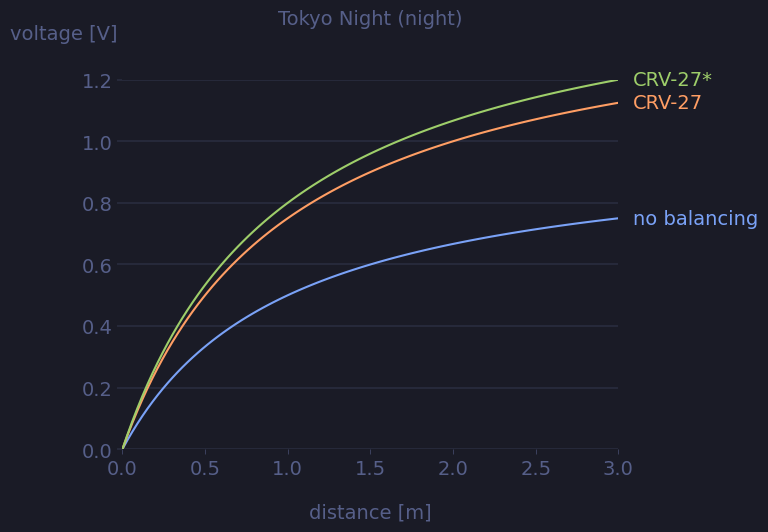

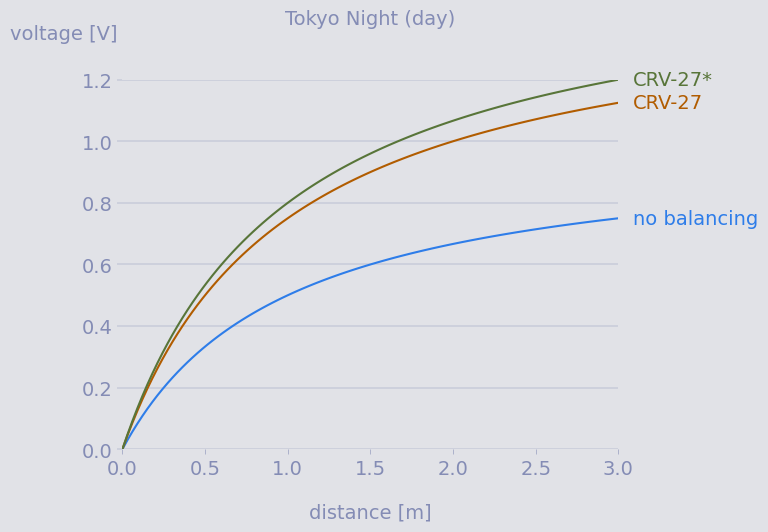

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import matplotx

offsets = [1.0, 1.50, 1.60]

x0 = np.linspace(0.0, 3.0, 100)
labels = ["no balancing", "CRV-27", "CRV-27*"]

schemes = {
    "Aura (dark)": matplotx.styles.aura["dark"],
    "Aura (dark soft)": matplotx.styles.aura["dark-soft"],
    "ayu (dark)": matplotx.styles.ayu["dark"],
    "ayu (light)": matplotx.styles.ayu["light"],
    "ayu (mirage)": matplotx.styles.ayu["mirage"],
    "Challenger Deep": matplotx.styles.challenger_deep,
    "Pitaya Smoothie (dark)": matplotx.styles.pitaya_smoothie["dark"],
    "Pitaya Smoothie (light)": matplotx.styles.pitaya_smoothie["light"],
    "Pacoty": matplotx.styles.pacoty,
    "Dracula": matplotx.styles.dracula,
    "GitHub (dark)": matplotx.styles.github["dark"],
    "GitHub (dimmed)": matplotx.styles.github["dimmed"],
    "GitHub (light)": matplotx.styles.github["light"],
    "gruvbox (dark)": matplotx.styles.gruvbox["dark"],
    "gruvbox (light)": matplotx.styles.gruvbox["light"],
    "Nord": matplotx.styles.nord,
    "One Dark": matplotx.styles.onedark,
    "Solarized (dark)": matplotx.styles.solarized["dark"],
    "Solarized (light)": matplotx.styles.solarized["light"],
    "Tableau 10": matplotx.styles.tab10,
    "Tableau 20": matplotx.styles.tab20,
    "Tokyo Night (storm)": matplotx.styles.tokyo_night["storm"],
    "Tokyo Night (night)": matplotx.styles.tokyo_night["night"],
    "Tokyo Night (day)": matplotx.styles.tokyo_night["day"],
}

for name, scheme in schemes.items():
    with plt.style.context(matplotx.styles.duftify(scheme)):
        for label, offset in zip(labels, offsets):
            y0 = offset * x0 / (x0 + 1)
            plt.plot(x0, y0, label=label)

        plt.xlabel("distance [m]")
        matplotx.ylabel_top("voltage [V]")
        plt.title(name)
        matplotx.line_labels()
        plt.show()
        plt.close()

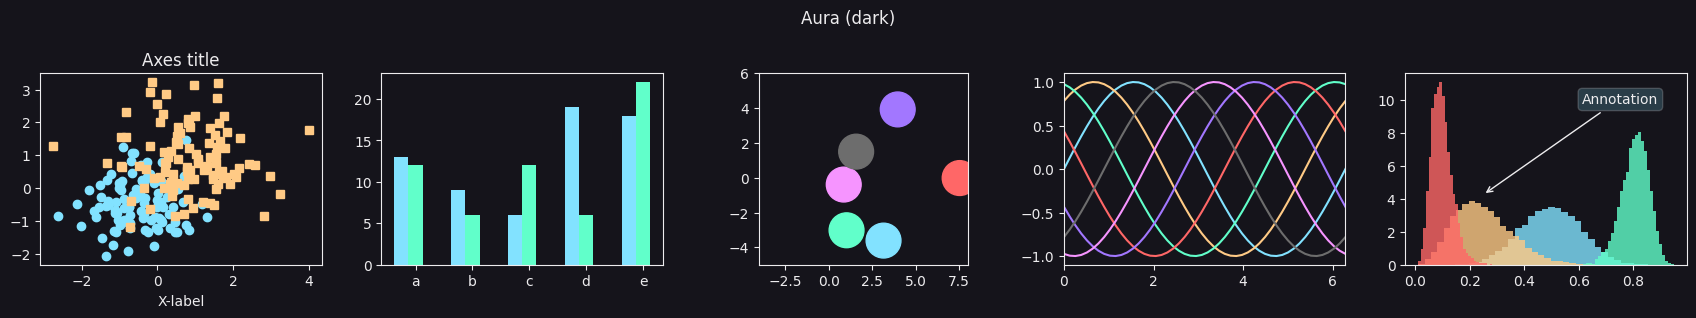

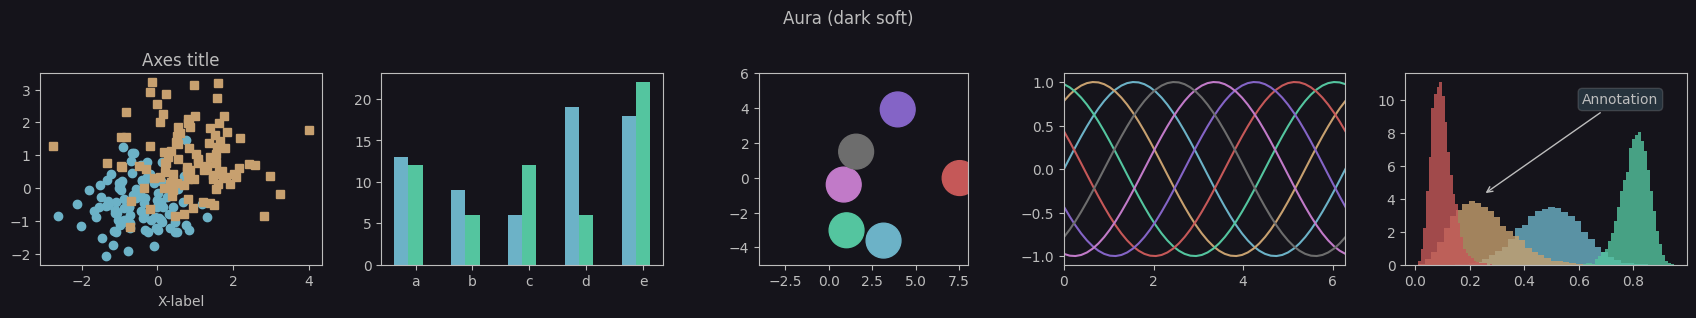

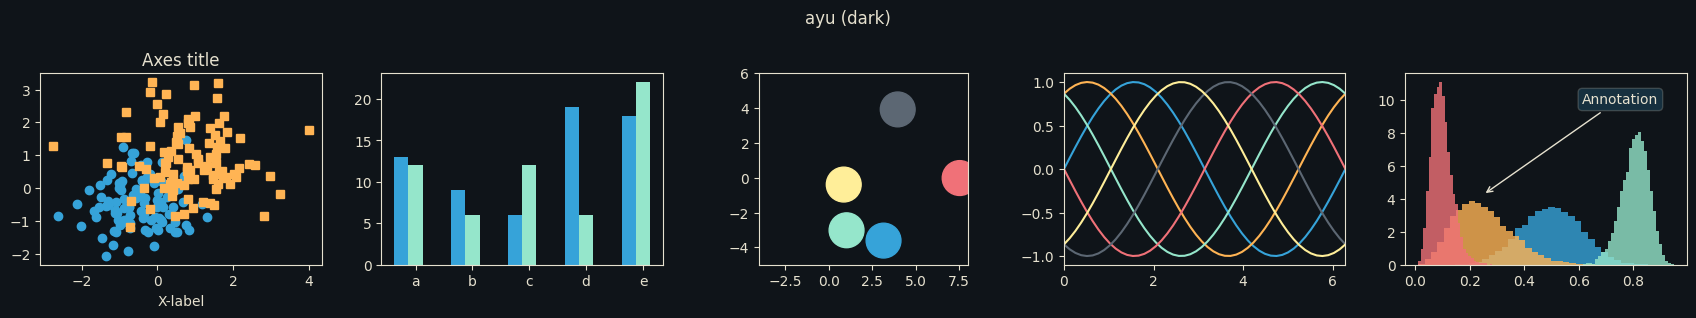

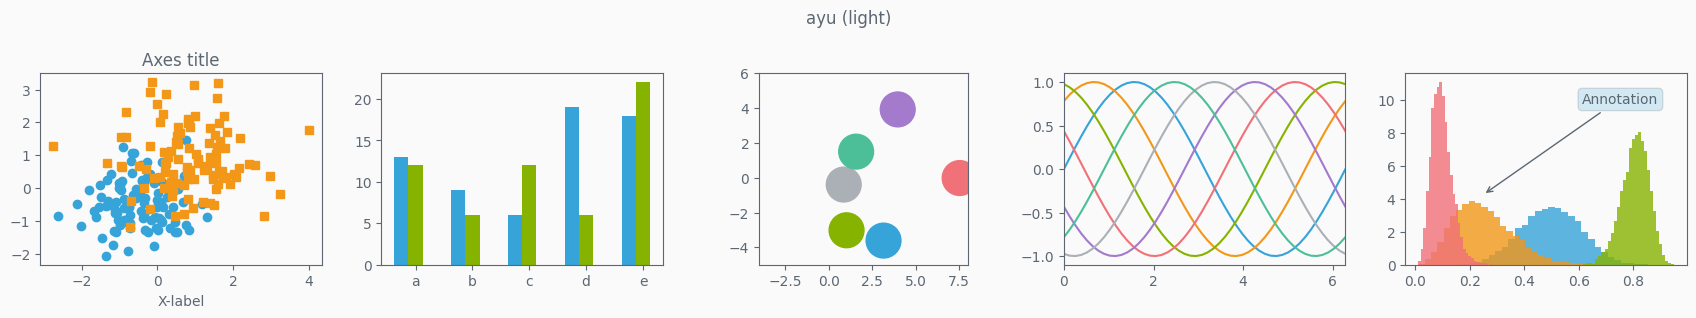

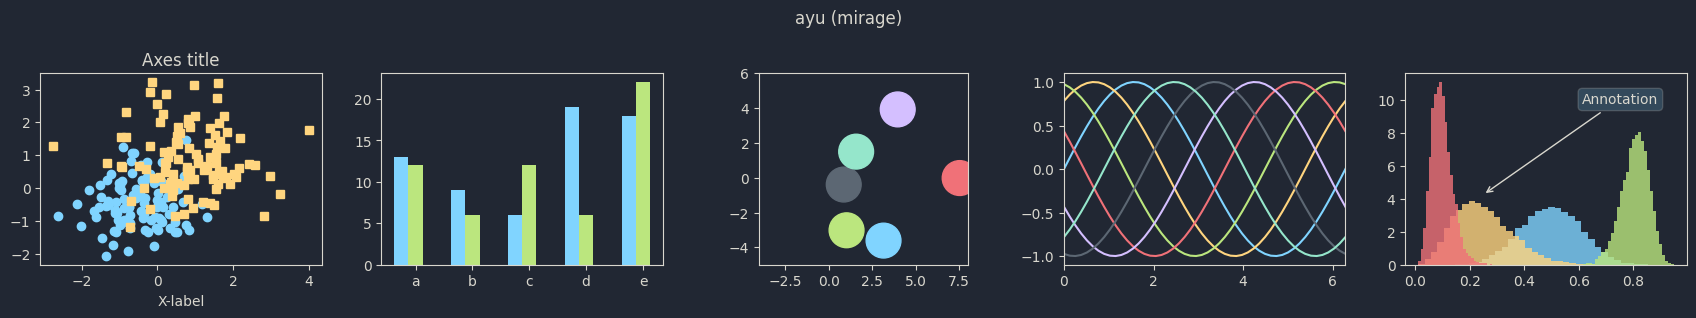

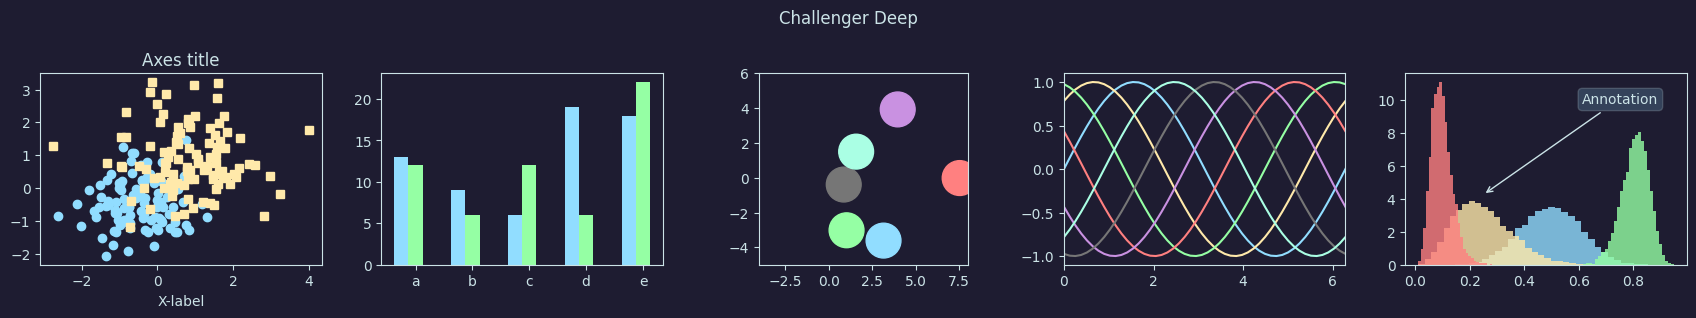

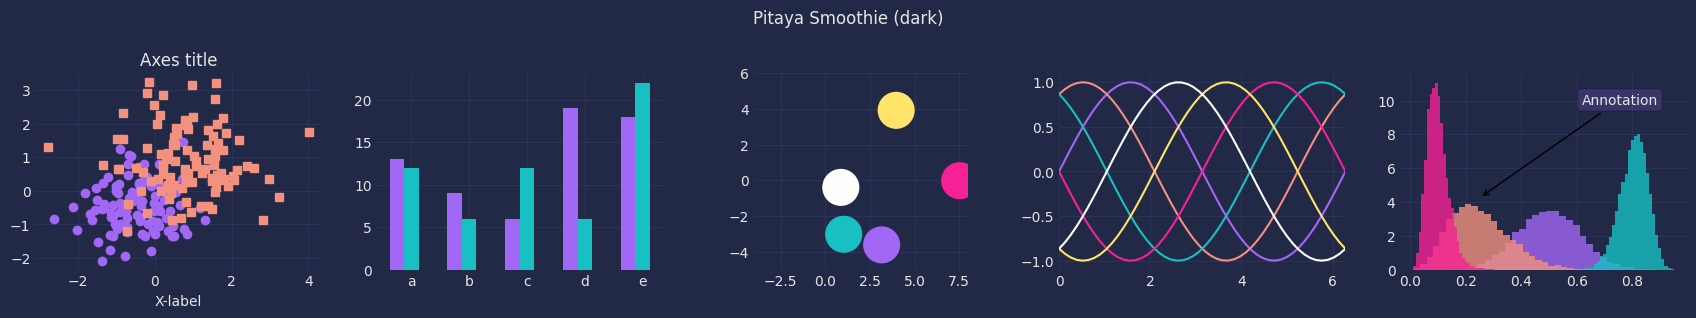

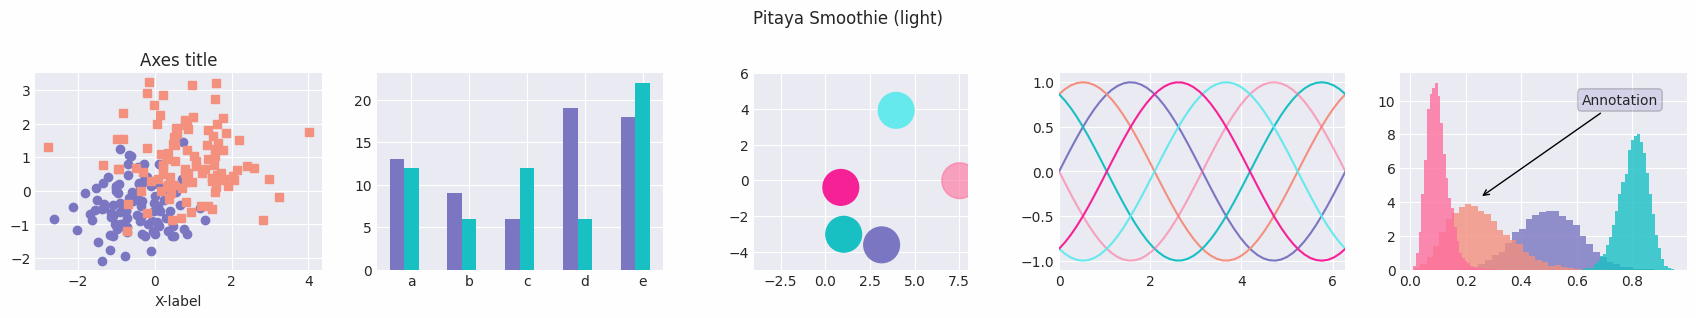

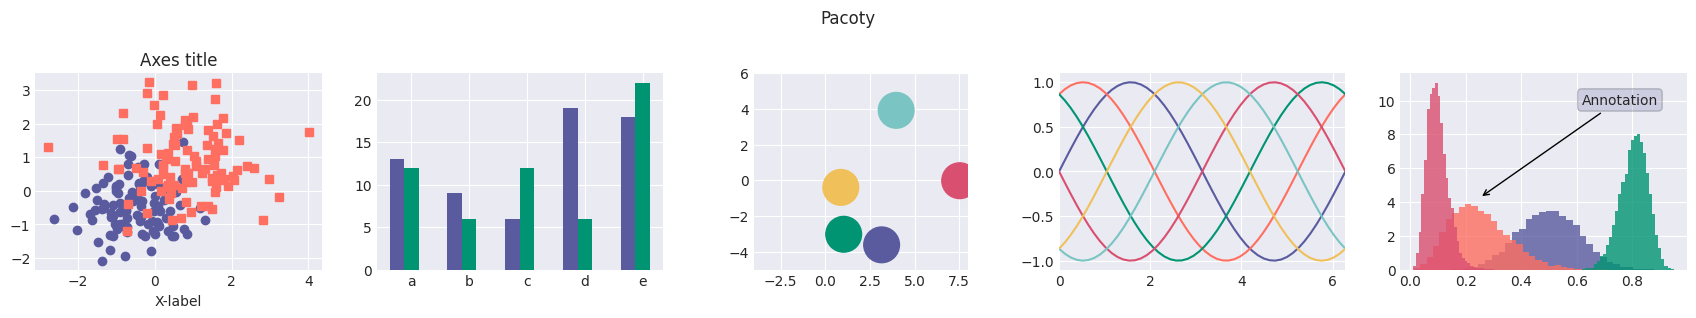

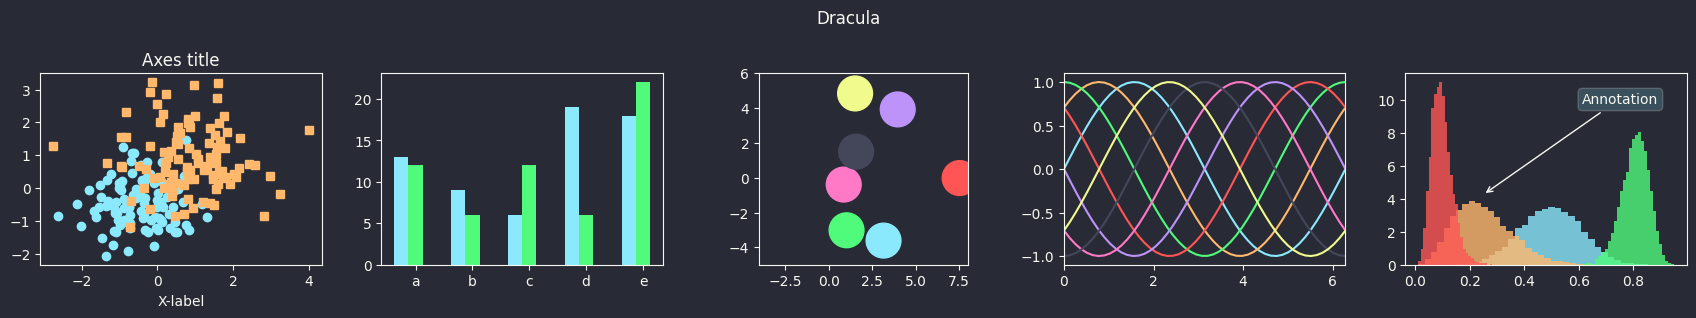

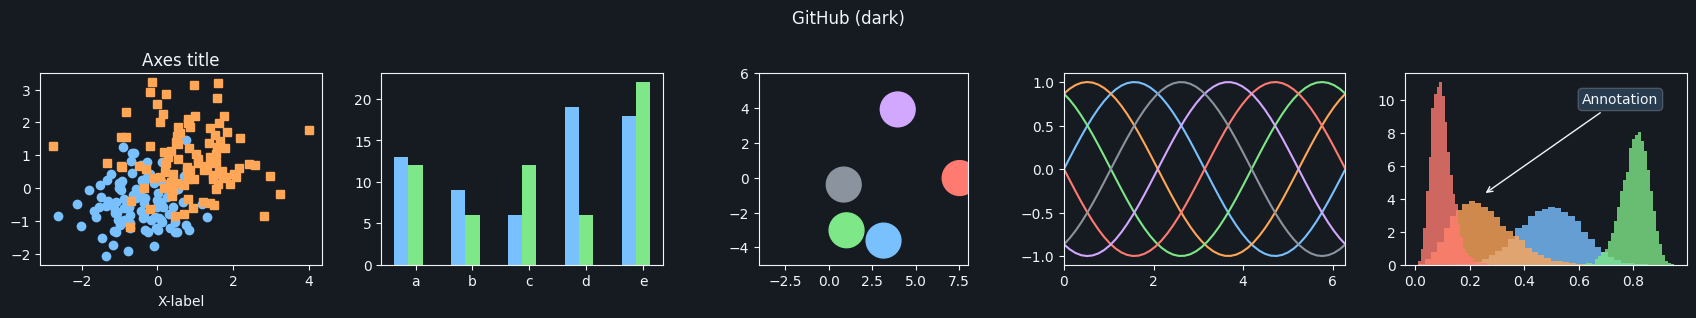

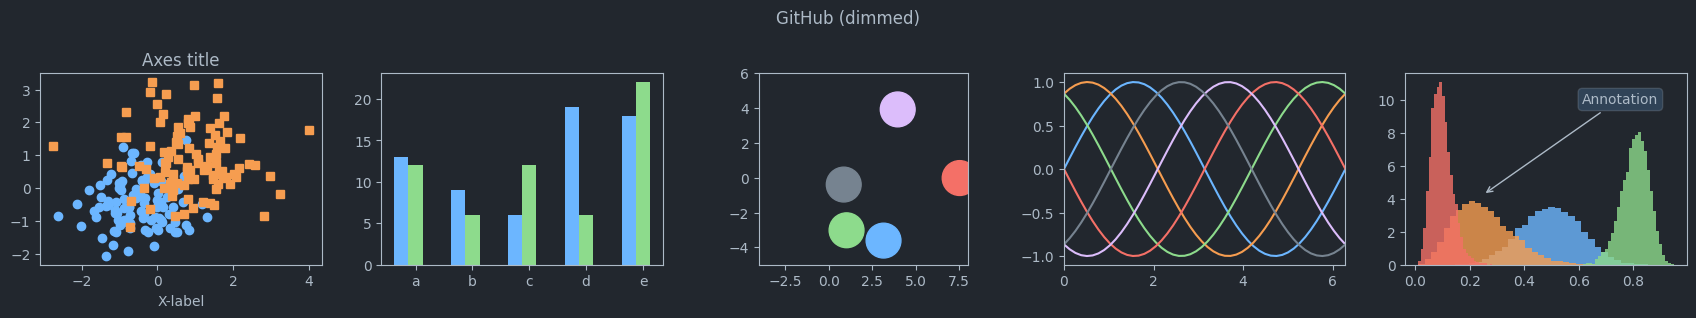

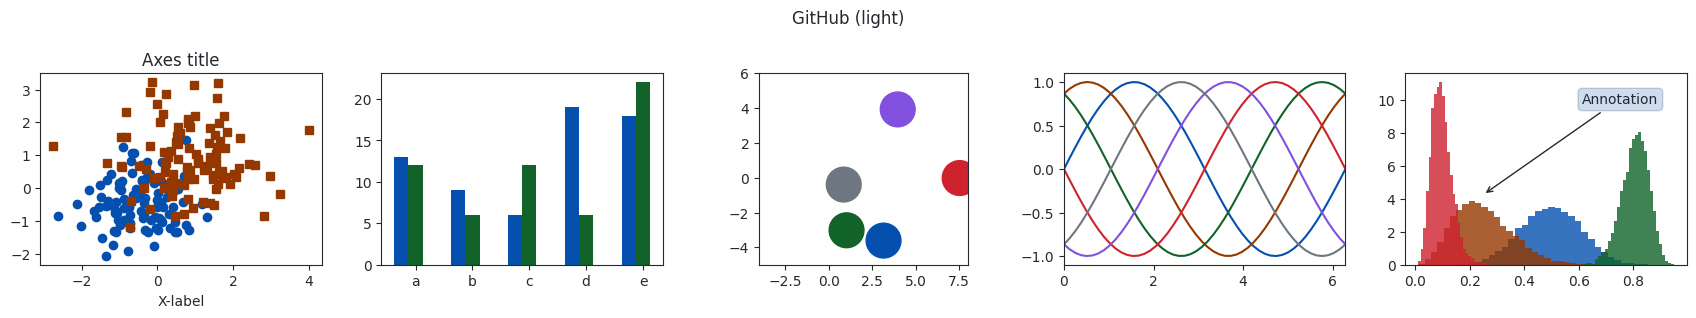

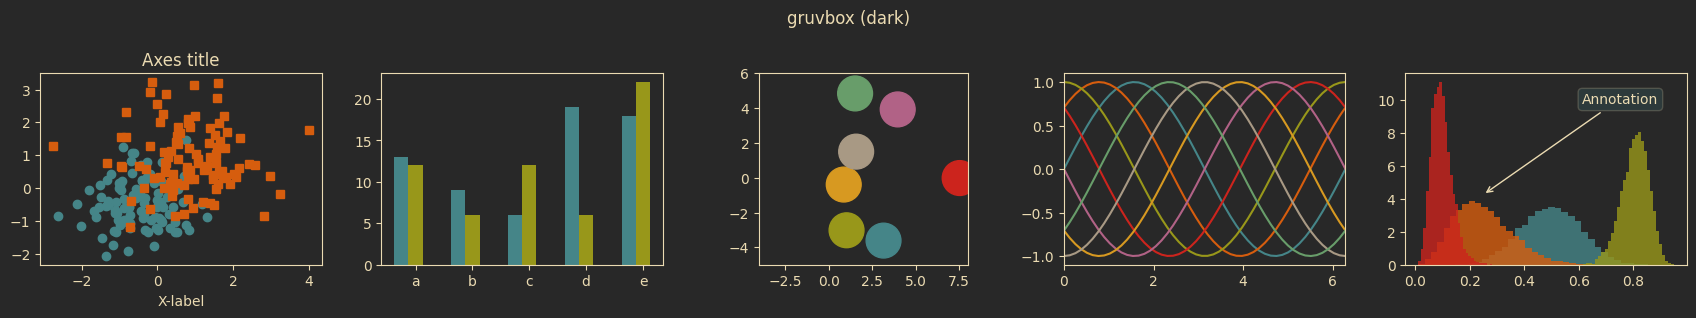

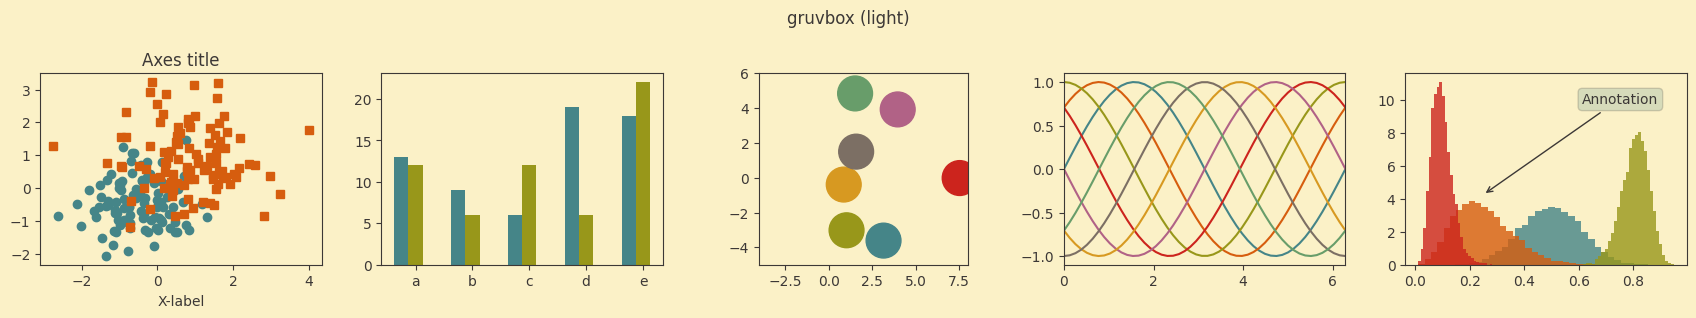

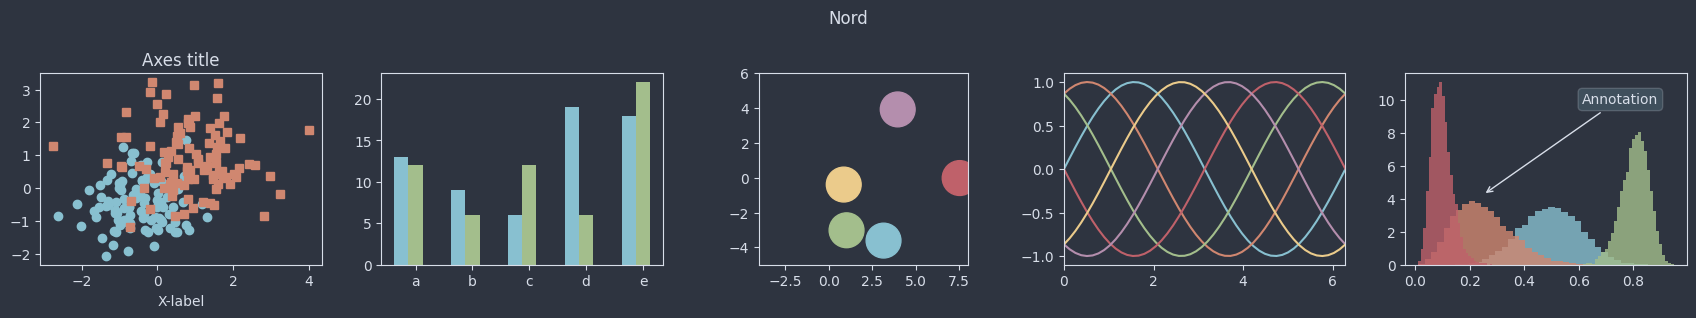

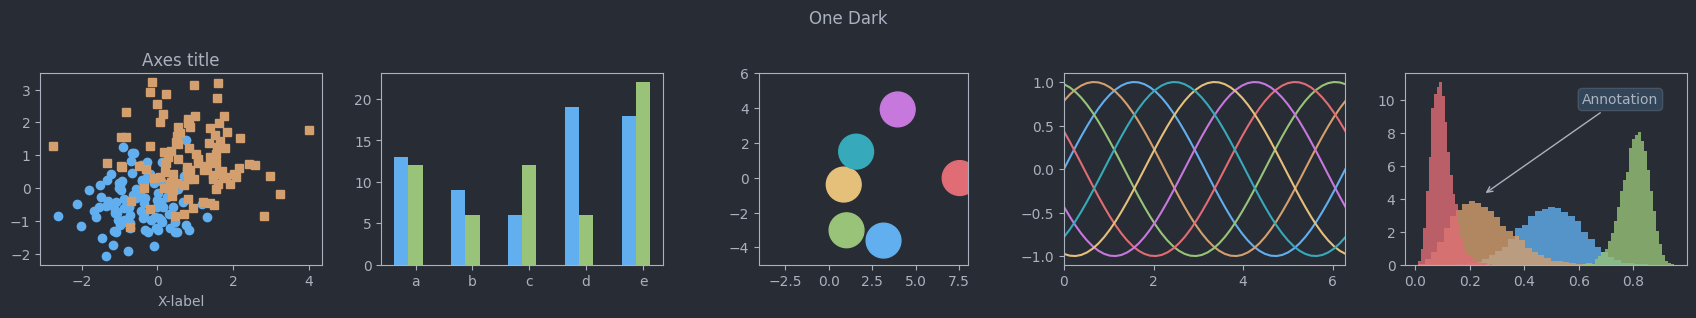

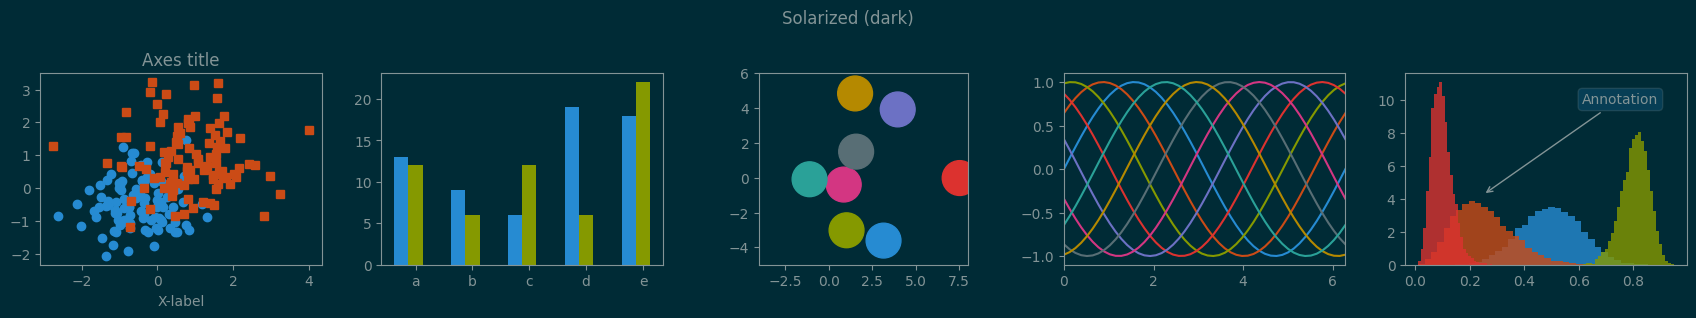

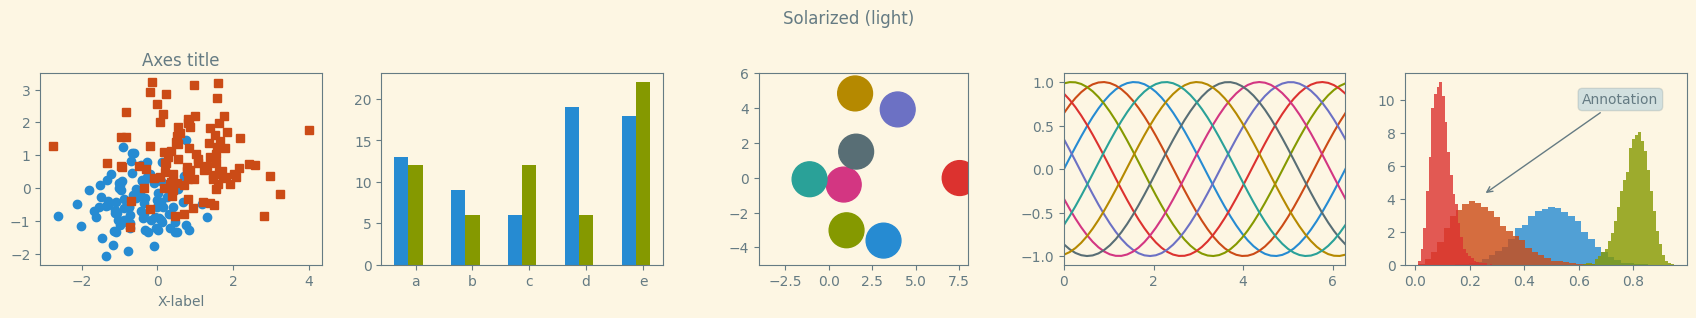

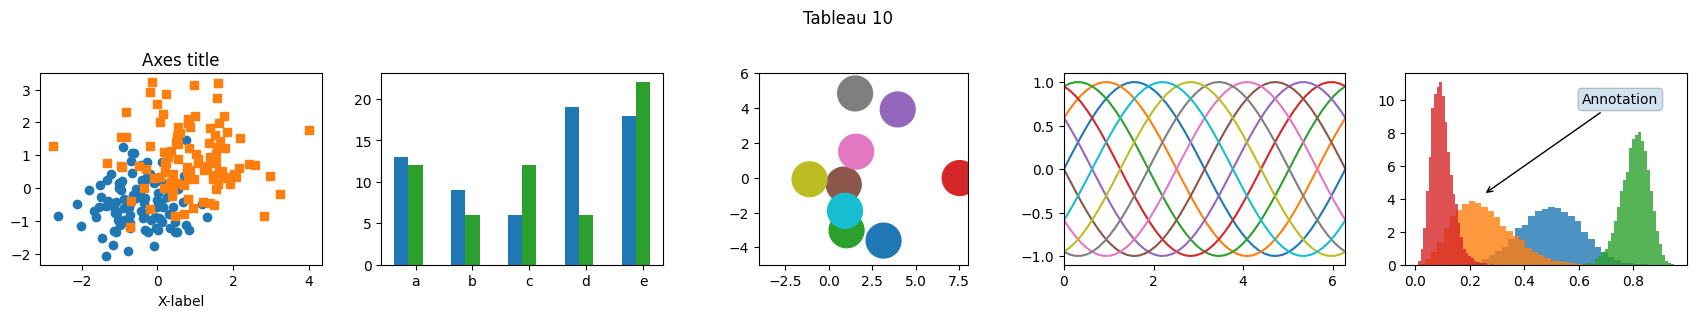

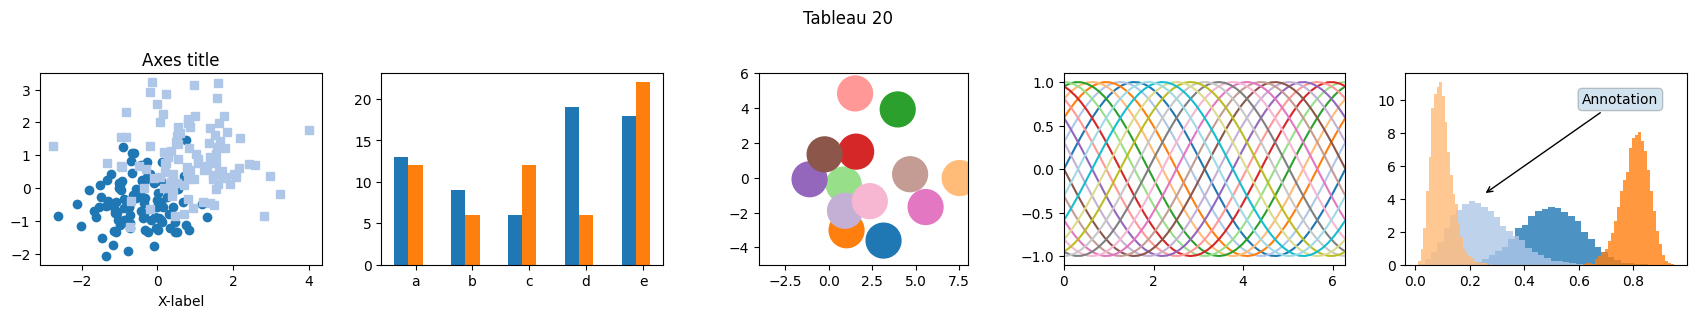

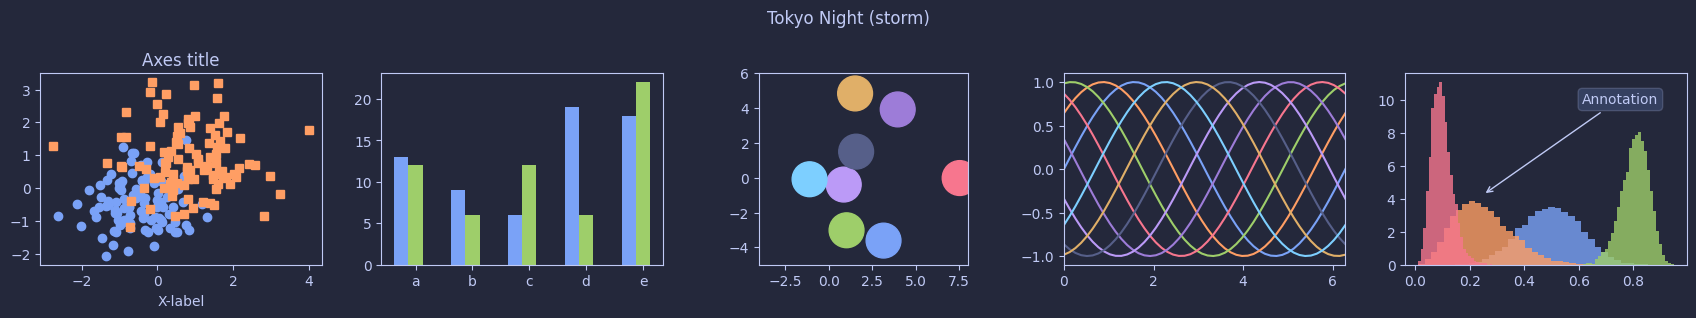

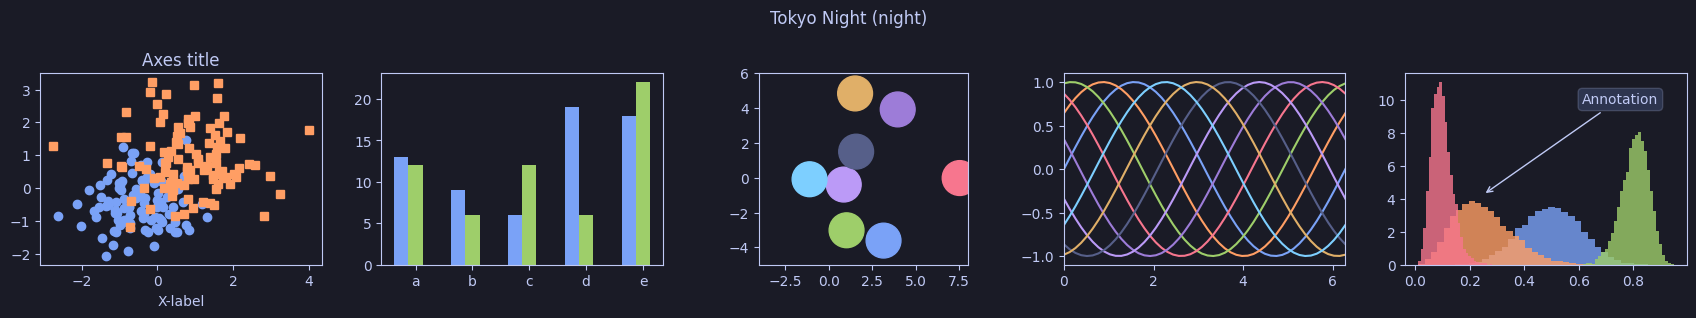

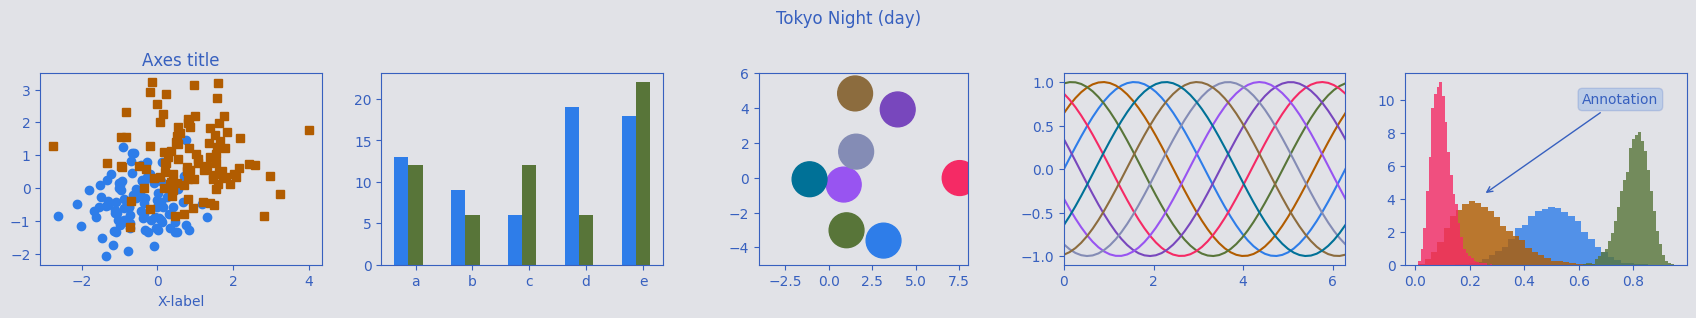

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotx

# Fixing random state for reproducibility
np.random.seed(19680801)


def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot."""
    for mu, sigma, marker in [(-0.5, 0.75, "o"), (0.75, 1.0, "s")]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls="none", marker=marker)
    ax.set_xlabel("X-label")
    ax.set_title("Axes title")
    return ax


def plot_colored_sinusoidal_lines(ax):
    """Plot sinusoidal lines with colors following the style color cycle."""
    L = 2 * np.pi
    x = np.linspace(0, L)
    nb_colors = len(plt.rcParams["axes.prop_cycle"])
    shift = np.linspace(0, L, nb_colors, endpoint=False)
    for s in shift:
        ax.plot(x, np.sin(x + s), "-")
    ax.set_xlim([x[0], x[-1]])
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels."""
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color="C2")
    ax.set_xticks(x + width)
    ax.set_xticklabels(["a", "b", "c", "d", "e"])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """
    Plot circle patches.
    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams["axes.prop_cycle"], range(nb_samples)):
        ax.add_patch(
            plt.Circle(
                prng.normal(scale=3, size=2), radius=1.0, color=sty_dict["color"]
            )
        )
    # Force the limits to be the same across the styles (because different
    # styles may have different numbers of available colors).
    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect("equal", adjustable="box")  # to plot circles as circles
    return ax


def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch."""
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation="none")
    c = plt.Circle((5, 5), radius=5, label="patch")
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation."""
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(values, histtype="stepfilled", bins=30, alpha=0.8, density=True)
    # Add a small annotation.
    ax.annotate(
        "Annotation",
        xy=(0.25, 4.25),
        xytext=(0.9, 0.9),
        textcoords=ax.transAxes,
        va="top",
        ha="right",
        bbox=dict(boxstyle="round", alpha=0.2),
        arrowprops=dict(
            arrowstyle="->", connectionstyle="angle,angleA=-95,angleB=35,rad=10"
        ),
    )
    return ax


def plot_figure(style_label):
    """Setup and plot the demonstration figure with a given style."""
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)

    # Tweak the figure size to be better suited for a row of numerous plots:
    # double the width and halve the height. NB: use relative changes because
    # some styles may have a figure size different from the default one.
    (fig_width, fig_height) = plt.rcParams["figure.figsize"]
    fig_size = [fig_width * 4 / 1.5, fig_height / 1.5]

    fig, axs = plt.subplots(
        ncols=5, nrows=1, num=style_label, figsize=fig_size, squeeze=True
    )
    fig.suptitle(style_label)

    plot_scatter(axs[0], prng)
    plot_bar_graphs(axs[1], prng)
    plot_colored_circles(axs[2], prng)
    plot_colored_sinusoidal_lines(axs[3])
    plot_histograms(axs[4], prng)
    fig.tight_layout()
    return fig


def _normalize(string):
    string = re.sub("[^0-9a-zA-Z ]+", "", string)
    return string.replace(" ", "-").lower()

schemes = {
    "Aura (dark)": matplotx.styles.aura["dark"],
    "Aura (dark soft)": matplotx.styles.aura["dark-soft"],
    "ayu (dark)": matplotx.styles.ayu["dark"],
    "ayu (light)": matplotx.styles.ayu["light"],
    "ayu (mirage)": matplotx.styles.ayu["mirage"],
    "Challenger Deep": matplotx.styles.challenger_deep,
    "Pitaya Smoothie (dark)": matplotx.styles.pitaya_smoothie["dark"],
    "Pitaya Smoothie (light)": matplotx.styles.pitaya_smoothie["light"],
    "Pacoty": matplotx.styles.pacoty,
    "Dracula": matplotx.styles.dracula,
    "GitHub (dark)": matplotx.styles.github["dark"],
    "GitHub (dimmed)": matplotx.styles.github["dimmed"],
    "GitHub (light)": matplotx.styles.github["light"],
    "gruvbox (dark)": matplotx.styles.gruvbox["dark"],
    "gruvbox (light)": matplotx.styles.gruvbox["light"],
    "Nord": matplotx.styles.nord,
    "One Dark": matplotx.styles.onedark,
    "Solarized (dark)": matplotx.styles.solarized["dark"],
    "Solarized (light)": matplotx.styles.solarized["light"],
    "Tableau 10": matplotx.styles.tab10,
    "Tableau 20": matplotx.styles.tab20,
    "Tokyo Night (storm)": matplotx.styles.tokyo_night["storm"],
    "Tokyo Night (night)": matplotx.styles.tokyo_night["night"],
    "Tokyo Night (day)": matplotx.styles.tokyo_night["day"],
}

for name, scheme in schemes.items():
    with plt.style.context(scheme):
        fig = plot_figure(name)
    plt.savefig(f"{_normalize(name)}.svg")
    plt.show()

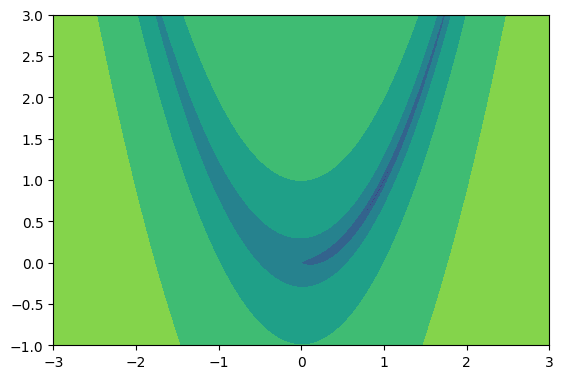

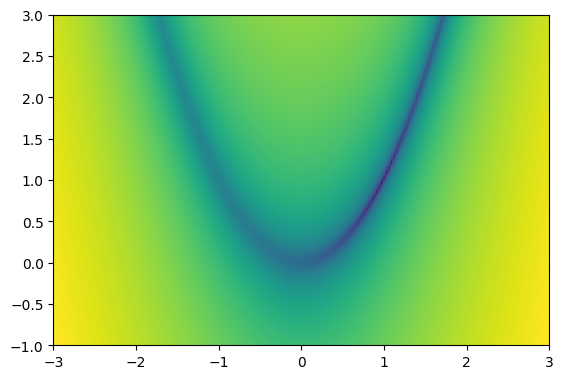

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import matplotx


def test_contours():
    def rosenbrock(x):
        return (1.0 - x[0]) ** 2 + 100.0 * (x[1] - x[0] ** 2) ** 2

    x = np.linspace(-3.0, 3.0, 200)
    y = np.linspace(-1.0, 3.0, 200)
    x, y = np.meshgrid(x, y)
    vals = rosenbrock(np.array([x, y]))
    plt.contourf(x, y, vals, locator=ticker.LogLocator())
    plt.gca().set_aspect("equal")
    plt.show()
    plt.close()

    matplotx.contours(
        rosenbrock,
        (-3.0, 3.0, 200),
        (-1.0, 3.0, 200),
        log_scaling=True,
        cmap="viridis",
    )
    plt.gca().set_aspect("equal")
    plt.show()
    plt.close()


test_contours()